<a href="https://colab.research.google.com/github/mfilipak/AUTOCOM2024/blob/main/ChatGP_Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Dados
data = {
    'Preço': [1200, 200, 50, 100, 3000, 150, 30, 80, 2200, 350, 60, 120, 2500, 100, 45, 110, 2000, 250, 35, 90, 2600, 220, 25, 150, 2800, 175, 40, 130, 3100, 300],
    'Custo': [800, 100, 20, 50, 2000, 75, 10, 40, 1500, 200, 30, 60, 1700, 50, 25, 55, 1300, 125, 15, 45, 1800, 110, 12, 75, 1900, 90, 18, 65, 2100, 150],
    'Estoque': [100, 150, 500, 250, 50, 300, 600, 200, 90, 400, 450, 350, 75, 500, 550, 300, 85, 450, 700, 400, 65, 350, 800, 220, 70, 600, 650, 380, 60, 420],
    'Promoção': ['Não', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não'],
    'Vendas_Mensais': [30, 50, 200, 40, 15, 60, 250, 30, 20, 70, 300, 50, 18, 80, 220, 35, 22, 65, 320, 45, 17, 55, 400, 55, 19, 75, 275, 60, 14, 85]
}

df = pd.DataFrame(data)
label_encoder = LabelEncoder()
df['Promoção'] = label_encoder.fit_transform(df['Promoção'])

# Divisão dos dados em treino e teste
X = df.drop('Vendas_Mensais', axis=1)
y = df['Vendas_Mensais']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)

X_train, X_test, y_train, y_test = X[:-5], X[-5:], y[:-5], y[-5:]



In [107]:
import plotly.graph_objects as go

# Definindo as cores para as linhas baseadas no tipo de dados (Treino ou Teste)
colors = ['lightgreen' if index < 25 else 'lightcoral' for index in range(30)]

# Criando a tabela usando Plotly com estilos condicionais
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='lightgrey',
                align='center',  # Centralizando o texto no cabeçalho
                font=dict(size=14),
                height=30),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color=[colors],  # Aplicando as cores às linhas
               align='center',  # Centralizando o texto nas células
               font=dict(size=12),
               height=25)
)])

# Ajustando a altura do layout para mostrar todas as linhas sem barra de rolagem
fig.update_layout(
    height=len(df) * 50 + 50,  # 25 pixels por linha + 50 pixels de cabeçalho
)

fig.show()

In [108]:
# Modelo de Random Forest com 100 árvores
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
# Resultados
print(f"Random Forest MSE: {mse_rf}")



Random Forest MSE: 296.39571999999987


In [109]:
# Modelo de rede neural com 2 camadas intermediárias
nn_model = MLPRegressor(hidden_layer_sizes=(100, 100), random_state=42, max_iter=1000)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
# Resultados
print(f"Neural Network MSE: {mse_nn}")




Neural Network MSE: 517.1672061164344


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



In [110]:
# Modelo de árvore de decisão
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Resultados
print(f"Decision Tree MSE: {mse_dt}")

Decision Tree MSE: 1210.2


In [111]:
preds = pd.DataFrame({"Venda Mensal":list(y_test), 'Modelo Random Forest':list(y_pred_rf), 'Modelo Rede Neural':list(y_pred_nn), "Árvore de Decisão":list(y_pred_dt)})

#abs((preds.to_numpy()-preds.to_numpy()[:,:1])[:,1:])
preds

,Venda Mensal,Modelo Random Forest,Modelo Rede Neural,Árvore de Decisão
0,75,78.10,101.485248,65.0
1,275,242.90,240.500573,200.0
2,60,55.20,47.897833,70.0
3,14,16.19,16.117632,15.0
4,85,64.65,61.693126,70.0


In [113]:
# Calculating the absolute difference between the actual monthly sales and each of the model's predictions
df_diff = preds.copy()
for column in preds.columns[1:]:
    df_diff[column] = (preds['Venda Mensal'] - preds[column]).abs()

import seaborn as sns


# Highlighting only the cell with the minimum value in each row for the columns other than 'Venda Mensal'
def highlight_min_in_row(data, color='lightgreen'):
    attr = f'background-color: {color}'
    if data.ndim == 1:  # Single column
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # DataFrame
        is_min = data == data.min(axis=1)[:, None]
        return pd.DataFrame(np.where(is_min, attr, ''), index=data.index, columns=data.columns)

# Applying the style
styled_df = df_diff.style.apply(highlight_min_in_row, axis=1, subset=['Modelo Random Forest', 'Modelo Rede Neural', 'Árvore de Decisão'])
styled_df


,Venda Mensal,Modelo Random Forest,Modelo Rede Neural,Árvore de Decisão
0,75,3.100000,26.485248,10.000000
1,275,32.100000,34.499427,75.000000
2,60,4.800000,12.102167,10.000000
3,14,2.190000,2.117632,1.000000
4,85,20.350000,23.306874,15.000000


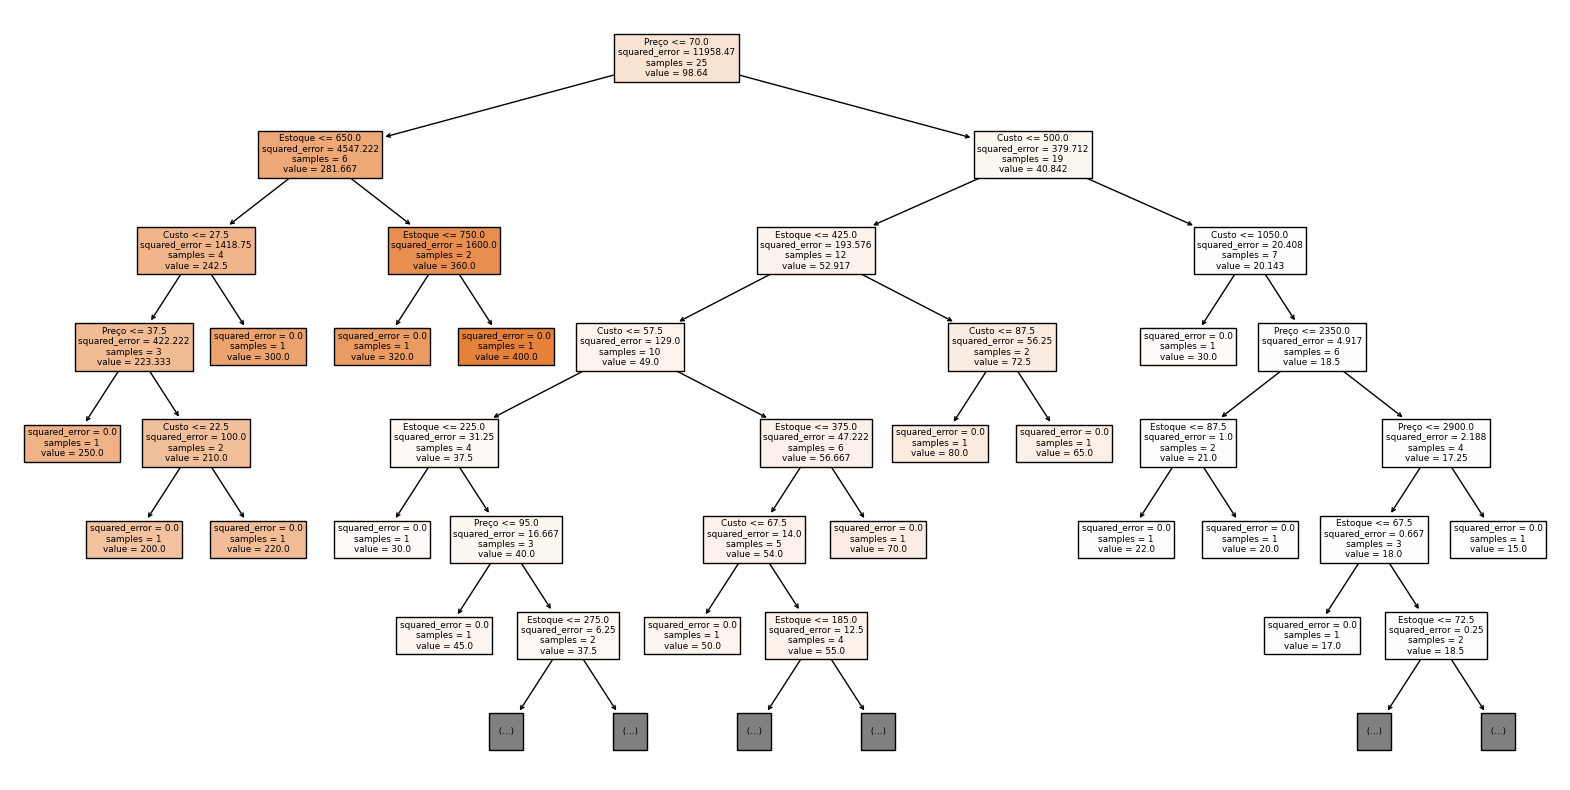

In [114]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=list(X.columns),max_depth=6)
plt.show()

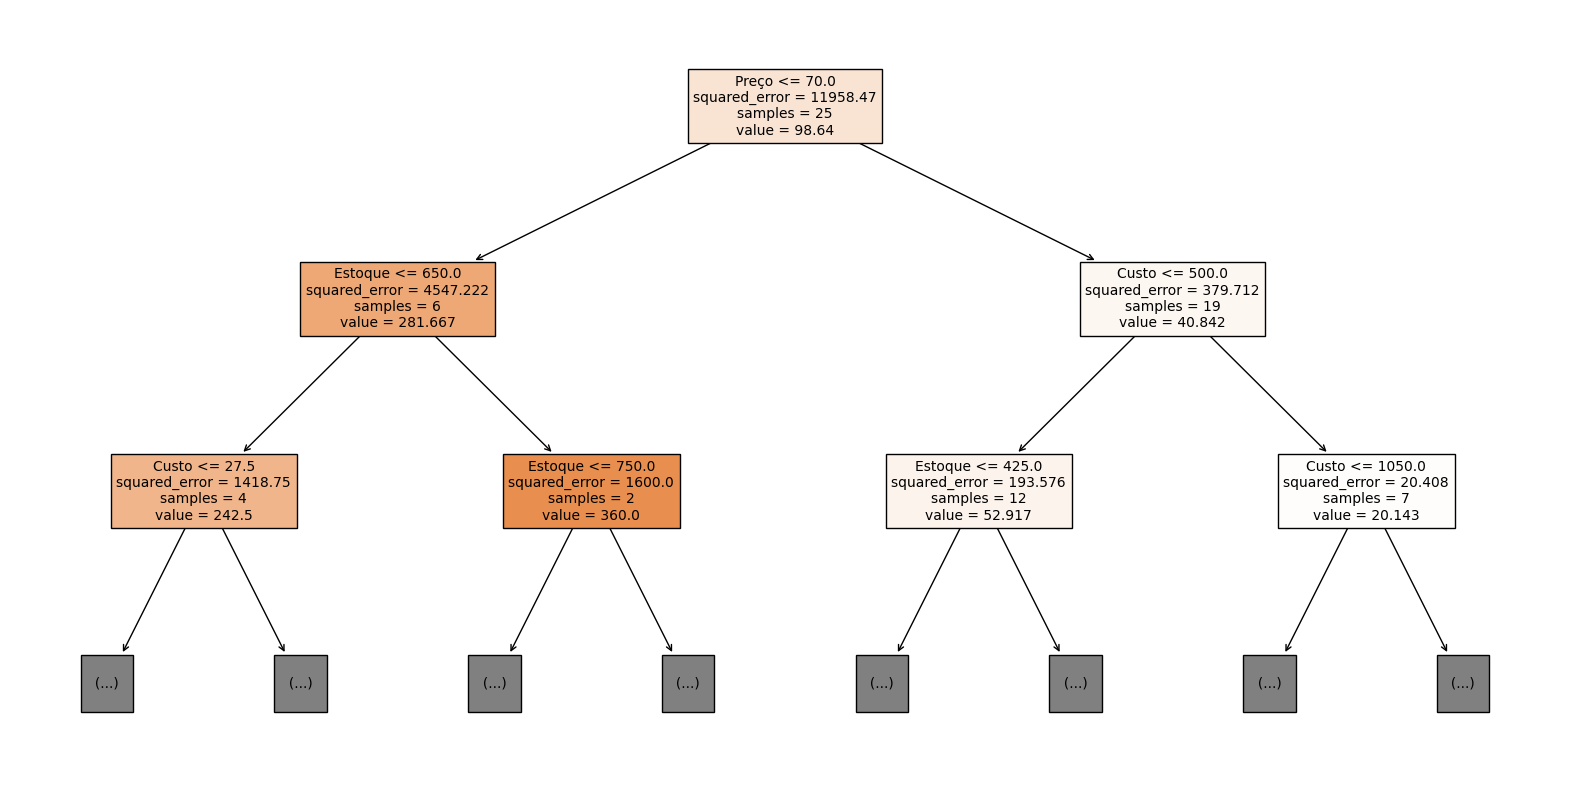

In [115]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=list(X.columns), max_depth=2)
plt.show()